# 01 - ComCam x Milliquas
Author: Olivia Lynn & Neven Caplar
Last Run: June 16, 2025

## Set up
Imports and dask

In [2]:
import lsdb
print(lsdb.__version__)
import hats
print(hats.__version__)
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import pandas as pd

from lsdb.core.search import ConeSearch

from dask.distributed import Client
from nested_pandas import NestedDtype

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


0.6.0
0.6


In [3]:
client = Client(n_workers=4, memory_limit="24GB", threads_per_worker=1)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 9459 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:23225
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:9459/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:14955'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:3427'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32693'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:17261'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:9875 name: 2
INFO:distributed.

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:9459/status,
Dashboard: http://127.0.0.1:9459/status,Workers: 4
Total threads: 4,Total memory: 89.41 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:23225,Workers: 4
Dashboard: http://127.0.0.1:9459/status,Total threads: 4
Started: Just now,Total memory: 89.41 GiB
Comm: tcp://127.0.0.1:22323,Total threads: 1
Dashboard: http://127.0.0.1:7375/status,Memory: 22.35 GiB
Nanny: tcp://127.0.0.1:14955,


INFO:distributed.scheduler:Remove client Client-e97a6190-4ae0-11f0-ab66-303ea7003404
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:30874; closing.
INFO:distributed.scheduler:Remove client Client-e97a6190-4ae0-11f0-ab66-303ea7003404
INFO:distributed.scheduler:Close client connection: Client-e97a6190-4ae0-11f0-ab66-303ea7003404
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1750099082.3484876') (0, 1, 2, 3)
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:30850; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:30864; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:30846; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:22323 name: 0 (stimulus_id='handle-worker-cleanup-1750099082.3568182')
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:24323 name: 1 (stimulus_id='handle-worker-cleanup-1750099082.357494')
INFO:distributed.sche

## Get catalogs
ComCam object catalog and MilliQuas - we will crossmatch



In [4]:
comcam_cat = lsdb.open_catalog('/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0/object_collection/object_lc')
comcam_cat_lite = lsdb.open_catalog('/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0/object_collection_lite/object_lc')

comcam_cat

Dask NestedFrame Structure:
                              tract           patch            z_ra           z_dec         z_raErr        z_decErr    z_ra_dec_Cov       z_psfFlux    z_psfFluxErr  z_free_psfFlux z_free_psfFluxErr z_free_psfFlux_flag          z_bdE1          z_bdE2         z_bdReB         z_bdReD        z_bdChi2       z_bdFluxB    z_bdFluxBErr       z_bdFluxD    z_bdFluxDErr   z_gaapPsfFlux z_gaapPsfFluxErr   z_gaap0p7Flux z_gaap0p7FluxErr   z_gaap1p0Flux z_gaap1p0FluxErr   z_gaap1p5Flux z_gaap1p5FluxErr   z_gaap2p5Flux z_gaap2p5FluxErr   z_gaap3p0Flux z_gaap3p0FluxErr z_gaapOptimalFlux z_gaapOptimalFluxErr           z_ixx           z_iyy           z_ixy       z_i_flag        z_ixxPSF        z_iyyPSF        z_ixyPSF    z_iPSF_flag      z_ixxRound      z_iyyRound      z_ixyRound  z_iRound_flag z_ixxDebiasedPSF z_iyyDebiasedPSF z_ixyDebiasedPSF z_iDebiasedPSF_flag       z_kronRad      z_kronFlux   z_kronFluxErr     z_calibFlux  z_calibFluxErr      z_ap03Flux   z_ap03FluxErr z_ap03Flux_flag      z_ap06Flux   z_ap06FluxErr z_ap06Flux_flag      z_ap09Flux   z_ap09FluxErr z_ap09Flux_flag      z_ap12Flux   z_ap12FluxErr z_ap12Flux_flag      z_ap17Flux   z_ap17FluxErr z_ap17Flux_flag      z_ap25Flux   z_ap25FluxErr z_ap25Flux_flag      z_ap35Flux   z_ap35FluxErr z_ap35Flux_flag      z_ap50Flux   z_ap50FluxErr z_ap50Flux_flag      z_ap70Flux   z_ap70FluxErr z_ap70Flux_flag  z_extendedness z_sizeExtendedness   z_blendedness          z_fwhm    z_cModelFlux z_cModelFluxErr z_cModelFlux_inner z_free_cModelFlux z_free_cModelFluxErr z_free_cModelFlux_inner z_free_cModelFlux_flag z_hsmShapeRegauss_e1 z_hsmShapeRegauss_e2 z_hsmShapeRegauss_sigma z_hsmShapeRegauss_flag z_hsm_moments_30 z_hsm_momentsPsf_30 z_hsm_moments_21 z_hsm_momentsPsf_21 z_hsm_moments_12 z_hsm_momentsPsf_12 z_hsm_moments_03 z_hsm_momentsPsf_03 z_hsm_moments_40 z_hsm_momentsPsf_40 z_hsm_moments_31 z_hsm_momentsPsf_31 z_hsm_moments_22 z_hsm_momentsPsf_22 z_hsm_moments_13 z_hsm_momentsPsf_13 z_hsm_moments_04 z_hsm_momentsPsf_04 z_hsm_moments_flag z_hsm_momentsPsf_flag    z_inputCount z_deblend_dataCoverage z_deblend_blendedness z_deblend_fluxOverlap z_deblend_fluxOverlapFraction z_deblend_zeroFlux z_psfModel_TwoGaussian_gauss1_sigma_x z_psfModel_TwoGaussian_gauss1_sigma_y z_psfModel_TwoGaussian_gauss1_rho z_psfModel_TwoGaussian_gauss1_fluxfrac z_psfModel_TwoGaussian_gauss2_sigma_x z_psfModel_TwoGaussian_gauss2_sigma_y z_psfModel_TwoGaussian_gauss2_rho z_psfModel_TwoGaussian_n_iter z_psfModel_TwoGaussian_chisq_reduced z_psfModel_TwoGaussian_unknown_flag z_psfModel_TwoGaussian_no_inputs_flag z_inputCount_flag z_inputCount_flag_noInputs  z_psfFlux_area z_psfFlux_flag z_psfFlux_flag_apCorr z_psfFlux_flag_edge z_psfFlux_flag_noGoodPixels  z_cModel_flag z_cModel_flag_apCorr z_gaapFlux_flag z_gaapFlux_flag_edge z_gaapFlux_flag_gaussianization z_gaapOptimalFlux_flag_bigPsf z_gaap0p7Flux_flag_bigPsf z_gaap1p0Flux_flag_bigPsf z_gaap1p5Flux_flag_bigPsf z_gaap2p5Flux_flag_bigPsf z_gaap3p0Flux_flag_bigPsf z_blendedness_flag z_pixelFlags_bad z_pixelFlags_clipped z_pixelFlags_clippedCenter z_pixelFlags_cr z_pixelFlags_crCenter z_pixelFlags_edge z_pixelFlags_inexact_psf z_pixelFlags_inexact_psfCenter z_pixelFlags_interpolated z_pixelFlags_interpolatedCenter z_pixelFlags_nodata z_pixelFlags_offimage z_pixelFlags_saturated z_pixelFlags_saturatedCenter z_pixelFlags_sensor_edge z_pixelFlags_sensor_edgeCenter z_pixelFlags_suspect z_pixelFlags_suspectCenter z_extendedness_flag z_sizeExtendedness_flag z_invalidPsfFlag z_calib_astrometry_used z_calib_photometry_reserved z_calib_photometry_used z_calib_psf_candidate z_calib_psf_reserved z_calib_psf_used  z_apFlux_flag z_apFlux_flag_apertureTruncated z_apFlux_flag_sincCoeffsTruncated z_calibFlux_flag z_calibFlux_flag_apertureTruncated z_calibFlux_flag_sincCoeffsTruncated z_centroid_flag    z_centroid_x z_centroid_xErr    z_centroid_y z_centroid_yErr z_kronFlux_flag z_kronFlux_flag_bad_radius z_kronFlux_flag_bad_shape z_kronFlux_flag_bad_sha

In [5]:
miliquas_cat = lsdb.read_hats(
    "/sdf/data/rubin/user/olynn/AGNs/hats/Milliquas_v8",
    margin_cache="/sdf/data/rubin/u/olynn/AGNs/hats/Milliquas_v8_margin/Milliquas_v8_10arcs",
)

miliquas_cat

,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
npartitions=12,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],float[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow]
"Order: 0, Pixel: 1",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Do crossmatch
ComCam x MilliQuas

In [6]:
comcam_x_milliquas = comcam_cat_lite.crossmatch(miliquas_cat, suffixes=["_COM", "_MIL"], radius_arcsec=.1)

comcam_x_milliquas_computed = comcam_x_milliquas.compute()

In [7]:
comcam_x_milliquas_computed.to_parquet("/sdf/home/n/ncaplar/AGN/comcam_x_milliquas_computed.parquet") # The output file path


## Verify crossmatch


/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/hats/inspection/visualize_catalog.py:298: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'COMCAM x Milliquas'}>)

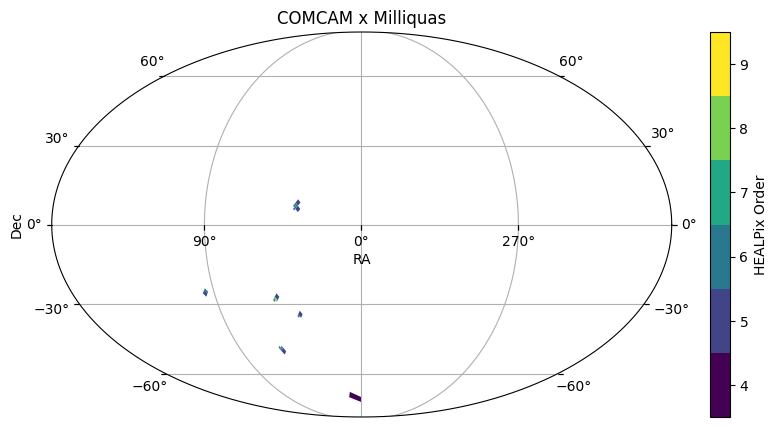

In [8]:
comcam_x_milliquas.plot_pixels(plot_title="COMCAM x Milliquas")


In [9]:
client.close()


INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:14955'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:3427'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:32693'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:17261'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:3427' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:17261' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:14955' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:32693' closed.


# Science 

In [10]:
len(comcam_x_milliquas_computed)

646

In [11]:
# Define the six fields from Data Preview 1 with RA and Dec coordinates
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45)  # Fornax Dwarf Spheroidal Galaxy
}

# Assign colors and linestyles
# Red for extragalactic fields, orange for dense fields
field_styles = {
    "ECDFS": ("red", "solid"),
    "EDFS": ("red", "dashed"),
    "Rubin_SV_38_7": ("red", "dotted"),
    "Rubin_SV_95_-25": ("orange", "solid"),
    "47_Tuc": ("orange", "dashed"),
    "Fornax_dSph": ("orange", "dotted"),
}


# Define a 2-degree (2*3600 arcseconds) search radius
radius_arcsec = 2 * 3600  # Convert 2 degree to arcseconds
# Create six cone searches
cones = {name: ConeSearch(ra=ra, dec=dec, radius_arcsec=radius_arcsec) for name, (ra, dec) in fields.items()}

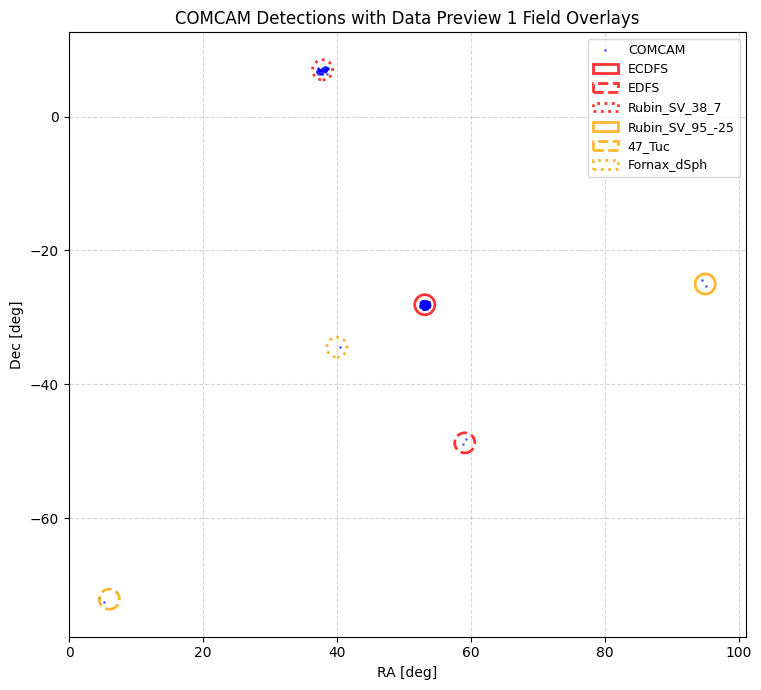

In [12]:
# Plot
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter COMCAM sources
ax.scatter(
    comcam_x_milliquas_computed['coord_ra_COM'],
    comcam_x_milliquas_computed['coord_dec_COM'],
    s=1,
    c='blue',
    alpha=0.5,
    label='COMCAM'
)

# Draw each field as a circle
field_radius = 1.5  # degrees
for name, (ra, dec) in fields.items():
    color, linestyle = field_styles[name]
    circle = Circle(
        (ra, dec),
        radius=field_radius,
        edgecolor=color,
        facecolor='none',
        linestyle=linestyle,
        linewidth=2,
        alpha=0.8,
        label=name
    )
    ax.add_patch(circle)

# Labels and formatting
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")
ax.set_title("COMCAM Detections with Data Preview 1 Field Overlays")
ax.legend(fontsize=9)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
comcam_x_milliquas_computed[['coord_ra_COM','coord_ra_COM','objectForcedSource_COM']].head(5)


coord_ra_COM  coord_ra_COM  \
_healpix_29                                    
9583286184993797     37.784845     37.784845   
9589207111731327     38.493227     38.493227   
9601744588162284     38.280597     38.280597   
9605063056789129     38.325578     38.325578   
9606443063715214     37.703596     37.703596   

                                             objectForcedSource_COM  
_healpix_29                                                          
9583286184993797  [{parentObjectId: 0, coord_ra: 37.784845, coor...  
9589207111731327  [{parentObjectId: 0, coord_ra: 38.493227, coor...  
9601744588162284  [{parentObjectId: 0, coord_ra: 38.280597, coor...  
9605063056789129  [{parentObjectId: 0, coord_ra: 38.325578, coor...  
9606443063715214  [{parentObjectId: 0, coord_ra: 37.703596, coor...

In [14]:
bands = ["u", "g", "r", "i", "z", "y"]

def count_bands(entry):
    result = {}
    for band in bands:
        try:
            result[band] = (entry['band'] == band).sum()
        except Exception:
            result[band] = 0
    return result


# Apply to each row
band_counts = comcam_x_milliquas_computed["objectForcedSource_COM"].apply(count_bands)
# Turn into a proper DataFrame
band_counts_df = pd.DataFrame(band_counts.tolist()).fillna(0).astype(int)

# Add to original
for band in bands:
    comcam_x_milliquas_computed[f"n_{band}"] = band_counts_df[band].values

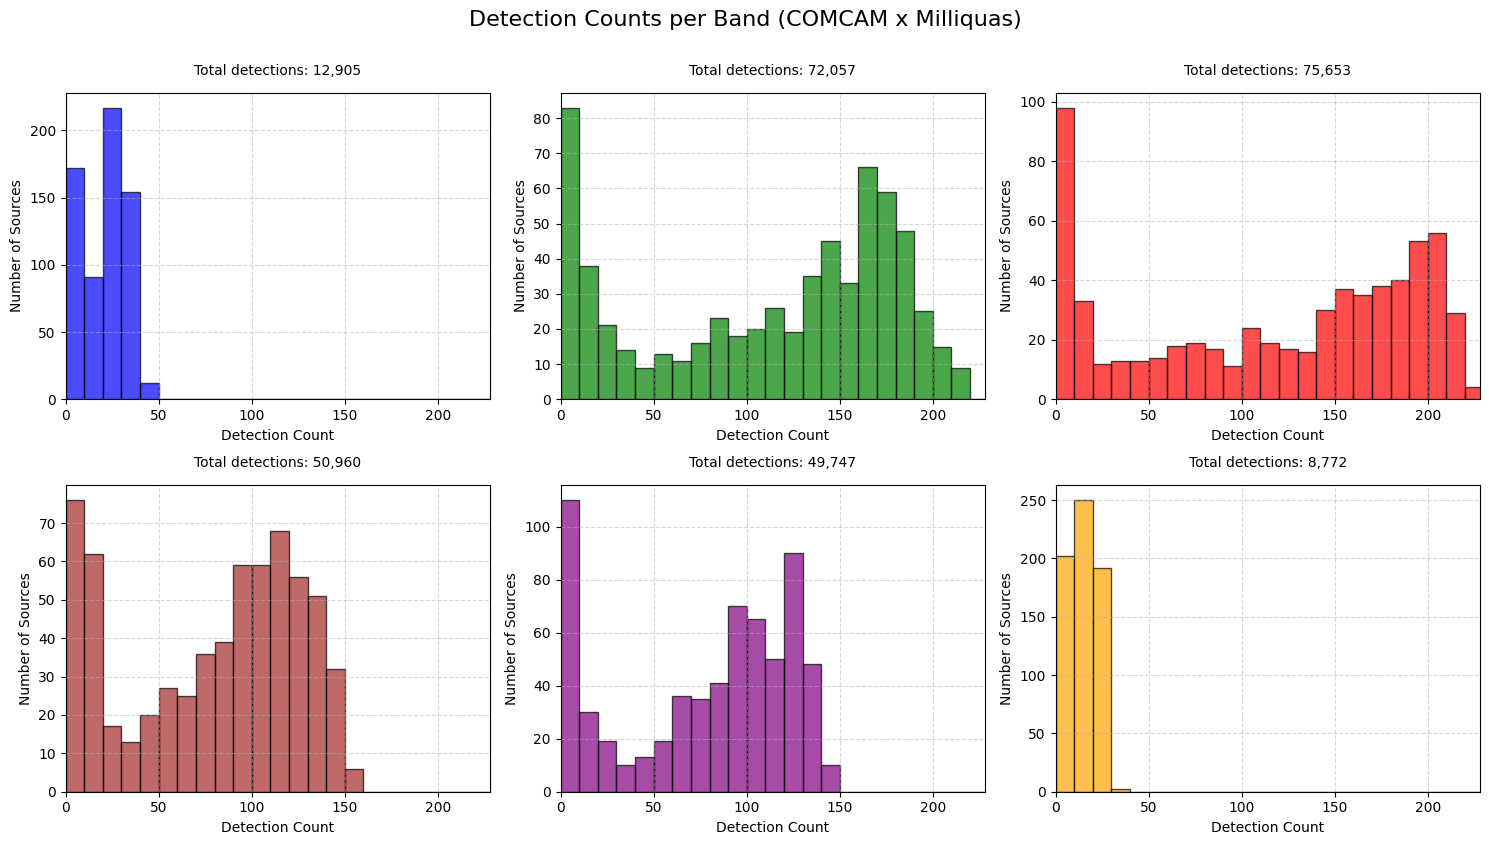

In [15]:

# Define band info: (column name, color)
bands = [
    ('n_u', 'blue'),
    ('n_g', 'green'),
    ('n_r', 'red'),
    ('n_i', 'brown'),
    ('n_z', 'purple'),
    ('n_y', 'orange'),
]

# Determine common bin range
all_counts = pd.concat([comcam_x_milliquas_computed[band] for band, _ in bands])
bin_min, bin_max = int(all_counts.min()), int(all_counts.max()) + 1
bins = list(range(bin_min, bin_max + 10, 10))  # Bin width = 10

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, (band, color) in zip(axes, bands):
    data = comcam_x_milliquas_computed[band].dropna()
    total_detections = int(data.sum())
    
    ax.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel("Detection Count")
    ax.set_ylabel("Number of Sources")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlim(bin_min, bin_max)

    # Add total detection count above the plot
    ax.text(0.5, 1.05, f"Total detections: {total_detections:,}", 
            transform=ax.transAxes, ha='center', va='bottom', 
            fontsize=10, color='black')

plt.tight_layout()
plt.suptitle("Detection Counts per Band (COMCAM x Milliquas)", fontsize=16, y=1.05)
plt.show()

## Plot lightcurves
Mag LCs

In [17]:
comcam_AGN_many_r = comcam_x_milliquas_computed[comcam_x_milliquas_computed['n_r']>220]


In [27]:
comcam_AGN_many_r.iloc[0]['objectForcedSource_COM']

,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,...,pixelFlags_saturatedCenter,pixelFlags_suspect,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,forcedSourceId,psfMag,psfMagErr,midpointMjdTai
0,0,53.29204,-28.101492,2024110800245,4,i,26094.712891,247.988312,False,-127.501312,...,False,False,False,False,5063,13,600320187511610982,20.358618,0.010318,60623.258521
1,0,53.29204,-28.101492,2024110800246,4,r,15105.254883,173.620209,False,-34.913006,...,False,False,False,False,5063,13,600320187645828800,20.952179,0.012480,60623.259329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0,53.29204,-28.101492,2024121000433,4,g,4996.374512,946.845337,False,1457.638672,...,False,False,False,False,5063,13,600460950232903586,22.153362,0.208272,60655.249581
801,0,53.29204,-28.101492,2024121000434,4,g,4181.365723,599.424011,False,296.313782,...,False,False,False,False,5063,13,600460950367120759,22.346704,0.156726,60655.249976


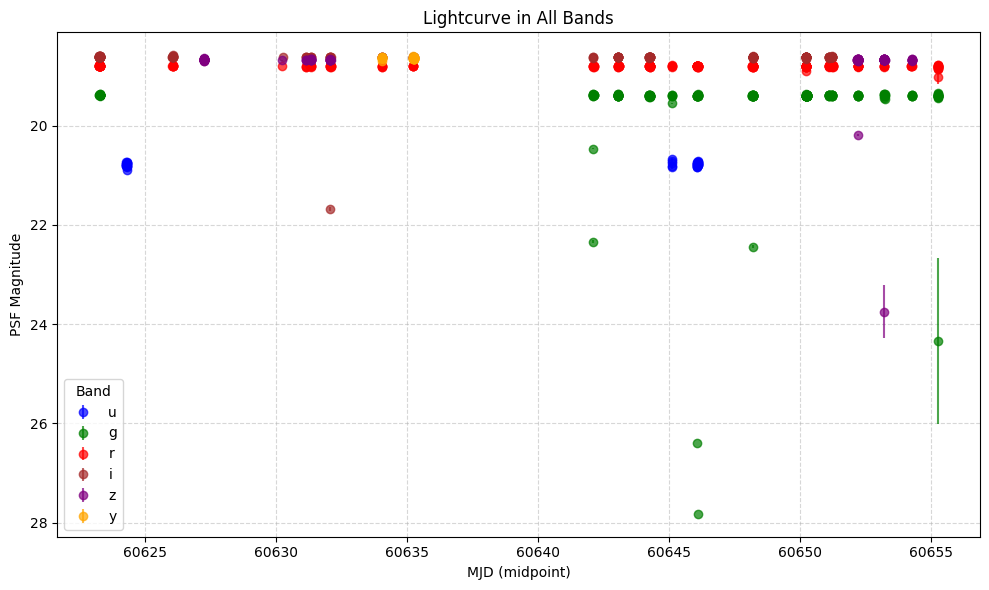

In [39]:

# Extract the nested DataFrame
df_lc = comcam_AGN_many_r.iloc[1]['objectForcedSource_COM']

# Define bands and their colors
band_colors = {
    'u': 'blue',
    'g': 'green',
    'r': 'red',
    'i': 'brown',
    'z': 'purple',
    'y': 'orange'
}

# Create figure
plt.figure(figsize=(10, 6))

# Loop over each band and plot
for band, color in band_colors.items():
    df_band = df_lc[df_lc['band'] == band]
    if df_band.empty:
        continue
    plt.errorbar(
        df_band['midpointMjdTai'], 
        df_band['psfMag'], 
        yerr=df_band['psfMagErr'], 
        fmt='o', 
        label=band, 
        color=color, 
        alpha=0.7
    )

# Configure plot
plt.gca().invert_yaxis()  # Magnitude scale
plt.xlabel("MJD (midpoint)")
plt.ylabel("PSF Magnitude")
plt.title("Lightcurve in All Bands")
plt.legend(title="Band")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

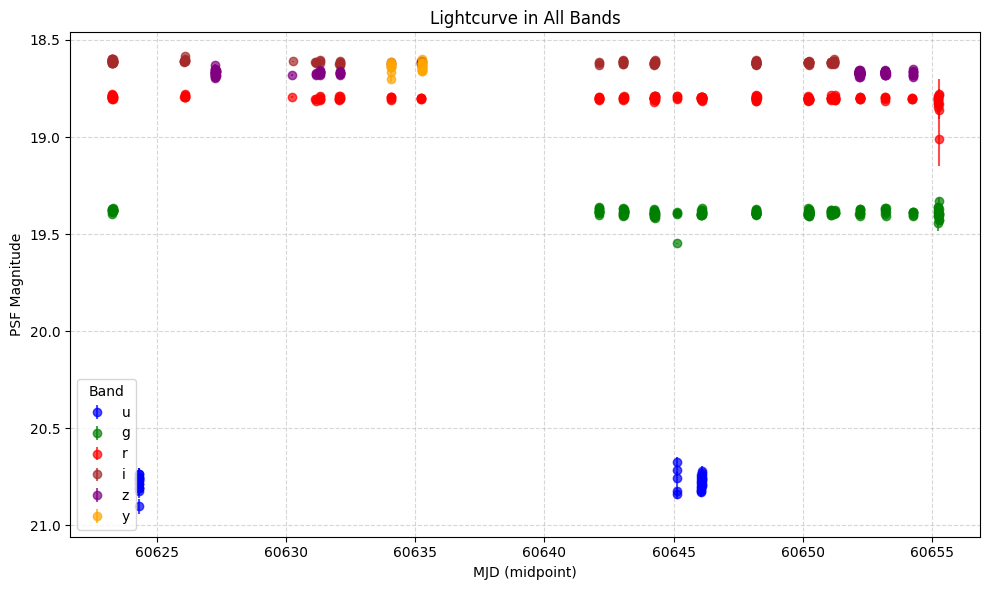

In [40]:
# Identify all columns containing "Flag"
flag_cols = [col for col in df_lc.columns if "Flag" in col]

# Keep only rows where all Flag columns are False or NaN
df_lc_clean = df_lc[~df_lc[flag_cols].any(axis=1)]

# Create figure
plt.figure(figsize=(10, 6))

# Loop over each band and plot
for band, color in band_colors.items():
    df_band = df_lc_clean[df_lc_clean['band'] == band]
    if df_band.empty:
        continue
    plt.errorbar(
        df_band['midpointMjdTai'], 
        df_band['psfMag'], 
        yerr=df_band['psfMagErr'], 
        fmt='o', 
        label=band, 
        color=color, 
        alpha=0.7
    )

# Configure plot
plt.gca().invert_yaxis()  # Magnitude scale
plt.xlabel("MJD (midpoint)")
plt.ylabel("PSF Magnitude")
plt.title("Lightcurve in All Bands")
plt.legend(title="Band")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

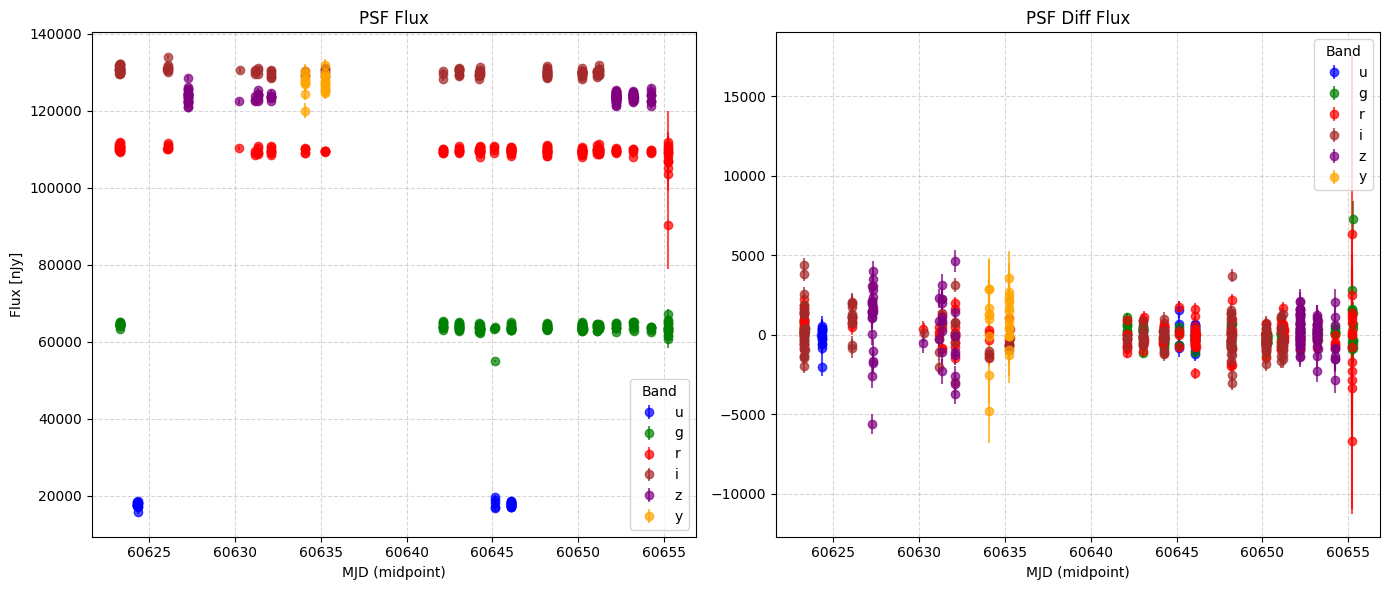

In [41]:
# Define band colors
band_colors = {
    'u': 'blue',
    'g': 'green',
    'r': 'red',
    'i': 'brown',
    'z': 'purple',
    'y': 'orange'
}

# Set up subplots: one for psfFlux, one for psfDiffFlux
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot for each band
for band, color in band_colors.items():
    df_band = df_lc_clean[df_lc_clean['band'] == band]
    if df_band.empty:
        continue

    # Left plot: psfFlux
    ax1.errorbar(
        df_band['midpointMjdTai'],
        df_band['psfFlux'],
        yerr=df_band['psfFluxErr'],
        fmt='o',
        label=band,
        color=color,
        alpha=0.7
    )

    # Right plot: psfDiffFlux
    ax2.errorbar(
        df_band['midpointMjdTai'],
        df_band['psfDiffFlux'],
        yerr=df_band['psfDiffFluxErr'],
        fmt='o',
        label=band,
        color=color,
        alpha=0.7
    )

# Format left subplot
ax1.set_title("PSF Flux")
ax1.set_xlabel("MJD (midpoint)")
ax1.set_ylabel("Flux [nJy]")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(title="Band")

# Format right subplot
ax2.set_title("PSF Diff Flux")
ax2.set_xlabel("MJD (midpoint)")
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(title="Band")

plt.tight_layout()
plt.show()

# Structure Function

In [47]:
df_lc_clean

,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,...,pixelFlags_saturatedCenter,pixelFlags_suspect,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,forcedSourceId,psfMag,psfMagErr,midpointMjdTai
0,0,53.194859,-28.146362,2024110800245,3,i,131699.671875,425.771149,False,1275.214600,...,False,False,False,False,5063,14,600320187511108705,18.601038,0.003510,60623.258521
1,0,53.194859,-28.146362,2024110800246,3,r,110174.554688,344.978485,False,973.623108,...,False,False,False,False,5063,14,600320187645326474,18.794796,0.003400,60623.259329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,53.194859,-28.146362,2024121000433,4,g,64836.800781,974.454102,False,432.774506,...,False,False,False,False,5063,14,600460950232910678,19.370445,0.016319,60655.249581
803,0,53.194859,-28.146362,2024121000434,4,g,63186.945312,661.446838,False,-381.160095,...,False,False,False,False,5063,14,600460950367127815,19.398432,0.011366,60655.249976


In [42]:
from numba import njit

@njit
def calcSF(taumin, taumax, tclip, fclip, nstep):
    dtau = (np.log10(taumax) - np.log10(taumin)) / nstep

    tau1 = np.zeros(nstep)
    tau2 = np.zeros(nstep)
    N = np.zeros(nstep)
    SF = np.zeros(nstep)

    for k in range(nstep):
        tau1[k] = 10**(np.log10(taumin) + k*dtau)
        tau2[k] = 10**(np.log10(tau1[k]) + dtau)
        for i in range(tclip.size):
            dist = tclip[i:] - tclip[i]
            sel = (dist >= tau1[k]) & (dist < tau2[k])
            N[k] += tclip[i:][sel].size
            if tclip[i:][sel].size > 0:
                SF[k] += np.sum((fclip[i:][sel] - fclip[i])**2)
        SF[k] = np.sqrt(SF[k] / N[k]) if N[k] > 0 else np.nan

    return tau1, tau2, SF, N

In [43]:
def SF_analysis(df, nstep=50, Nmin=2):
    objects = df['Object_ID'].unique()

    for obj in objects:
        obj_data_all = df[df['Object_ID'] == obj]

        fig_sf, ax_sf = plt.subplots(figsize=(7, 3))
        ax_sf.set_title(f"Structure Function: {obj}")

        for filt in sorted(df['Filter'].unique()):
            filt_data = obj_data_all[obj_data_all['Filter'] == filt].drop_duplicates(subset='Epoch')
            if filt_data.empty:
                continue

            filt_data = filt_data.sort_values(by='Epoch')
            mag = filt_data['Mag']

            # Iterative 5σ clipping
            count_old = len(mag) + 1
            count = len(mag)
            excluded = [[], []]

            while count_old > count:
                mag_mean = mag.mean()
                mag_std = mag.std(ddof=1)
                outliers = np.abs(mag - mag_mean) >= 5 * mag_std
                excluded[0] += filt_data['Epoch'][outliers].to_list()
                excluded[1] += mag[outliers].to_list()
                filt_data = filt_data[~outliers]
                mag = filt_data['Mag']
                count_old = count
                count = len(mag)

            if filt_data.empty:
                continue

            # Convert mag → normalized flux
            flux = 10**(-0.4 * (mag - np.median(mag)))
            time = filt_data['Epoch'].to_numpy()

            # SF time limits
            dtmin = np.min(np.diff(time))
            dtmax = time[-1] - time[0]
            taumin = 2 * dtmin
            taumax = 0.5 * dtmax

            tau1, tau2, SF, N = calcSF(taumin, taumax, time, flux.to_numpy(), nstep)

            ax_sf.loglog(tau1[N > Nmin], SF[N > Nmin], label=filt, marker="o", linestyle="")

        ax_sf.set_xlabel("Time lag (days)")
        ax_sf.set_ylabel("Structure Function")
        ax_sf.grid(True)
        ax_sf.legend()
        plt.show()

In [44]:
SF_analysis(df_lc_clean, nstep=50, Nmin=2)

KeyError: 'Object_ID'

In [ ]:
df_lc_clean